In [25]:
using BenchmarkTools
paramsfile = [ "benchmark-2020-05-29_18h49.json", 
    "benchmark-2020-06-01_15h36.json",
    "benchmark-2020-06-03_14h36.json", 
    "benchmark-2020-06-03_22h53.json",
    "benchmark-2020-06-07_12h06.json",
    "benchmark-2020-06-07_22h27.json",
    "benchmark-2020-06-10_17h43.json",
    "benchmark-2020-06-10_20h49.json",
    "benchmark-2020-06-11_11h33.json",
    "benchmark-2020-06-11_12h34.json",
    "benchmark-2020-06-12_18h15.json",
    "benchmark-2020-06-12_21h37.json"][end] #6
results = BenchmarkTools.load(paramsfile)[1]

using StructArrays
using DataFrames

data = StructArray([ (pattern=t[1][1], string = t[1][4], code=t[1][2], trial = t[2].time)
              for t in leaves(median(results))
              if t[1][3]=="match" ]) |> DataFrame 
data = unstack(data, [ :pattern, :string], :code, :trial)

data[!,:creation] .= data.string.=="1"
data[!,:ratio] .= data.Regcomb./data.Regex

groupby(data,:pattern)
adata = filter(row -> row.ratio!==missing && row.ratio>0.0 && row.ratio!=NaN && !(row.pattern in ["69","70"]),
                    sort(data, :Regcomb, rev=true))

adata[!,:type] = [ c ? "constructor" : "match" for c in adata.creation ]
adata[!,:lratio] = log10.(adata.ratio)
sort(adata, :ratio, rev=true)

,pattern,string,Regcomb,Regex,creation,ratio,type,lratio
,String,String,Float64?,Float64?,Bool,Float64,String,Float64
1,6,8,29405.5,410.0,0,71.7207,match,1.85564
2,27,4,7242.0,281.0,0,25.7722,match,1.41115
3,27,3,7082.0,275.0,0,25.7527,match,1.41082
4,50,2,6894.0,330.0,0,20.8909,match,1.31996
5,50,1,6522.0,327.0,1,19.945,constructor,1.29983
6,27,1,3619.0,196.0,1,18.4643,constructor,1.26633
7,32,1,3520.0,195.0,1,18.0513,constructor,1.25651
8,50,3,5467.0,312.0,0,17.5224,match,1.24359
9,51,1,4068.0,235.0,1,17.3106,constructor,1.23831


In [18]:
#groupby(data,:pattern)[9]
"benchmark-2020-06-07_22h27.json",
( range_Regcomb = extrema(filter(x->x!==missing,adata.Regcomb)),
  range_Regex = extrema(filter(x->x!==missing,adata.Regex)),
  proportion_better = sum([ ratio < 1.0 ? 1 : 0 for ratio in adata.ratio])/size(adata)[1],
  mean_ratio = mean(filter(x->x!==missing,adata.ratio)),
  ratio_mean = 10^(mean(log10.(filter(x->x!==missing,adata.Regcomb)))-
                   mean(log10.(filter(x->x!==missing,adata.Regex)))))

(range_Regcomb = (33.0, 30847.0), range_Regex = (85.0, 519.0), proportion_better = 0.5842696629213483, mean_ratio = 3.0180488634836666, ratio_mean = 1.1500606983576513)

In [17]:
#groupby(data,:pattern)[9]
( range_Regcomb = extrema(filter(x->x!==missing,adata.Regcomb)),
  range_Regex = extrema(filter(x->x!==missing,adata.Regex)),
  proportion_better = sum([ ratio < 1.0 ? 1 : 0 for ratio in adata.ratio])/size(adata)[1],
  mean_ratio = mean(filter(x->x!==missing,adata.ratio)),
  ratio_mean = 10^(mean(log10.(filter(x->x!==missing,adata.Regcomb)))-
                   mean(log10.(filter(x->x!==missing,adata.Regex)))))

(range_Regcomb = (37.0, 25518.0), range_Regex = (83.0, 517.0), proportion_better = 0.39325842696629215, mean_ratio = 2.0099602824083718, ratio_mean = 1.2777414785833945)

In [26]:
#groupby(data,:pattern)[9]
( range_Regcomb = extrema(filter(x->x!==missing,adata.Regcomb)),
  range_Regex = extrema(filter(x->x!==missing,adata.Regex)),
  proportion_better = sum([ ratio < 1.0 ? 1 : 0 for ratio in adata.ratio])/size(adata)[1],
  mean_ratio = mean(filter(x->x!==missing,adata.ratio)),
  ratio_mean = 10^(mean(log10.(filter(x->x!==missing,adata.Regcomb)))-
                   mean(log10.(filter(x->x!==missing,adata.Regex)))))

(range_Regcomb = (40.0, 29405.5), range_Regex = (85.0, 512.0), proportion_better = 0.41198501872659177, mean_ratio = 4.327274502829542, ratio_mean = 1.8904490673748067)

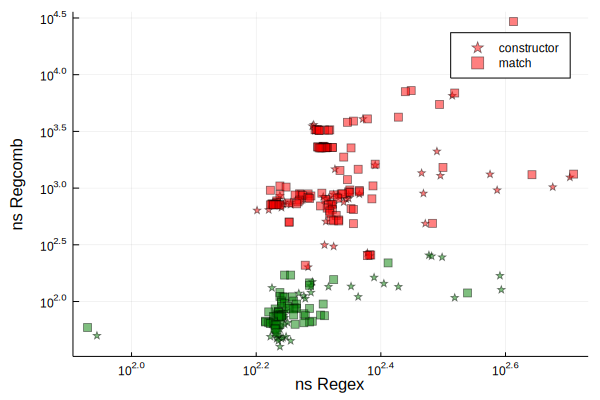

In [27]:
using StatsPlots
plotly()
Plots.PlotlyBackend()
gr()
scatter(adata.Regex, adata.Regcomb, 
    group = adata.type,
    markercolor= [ ratio < 1 ? :green : :red 
        for ratio in adata[!,(:ratio)] ],
    markershape= [ creation ? :star : :rect 
        for creation in adata[!,(:creation)] ],
    alpha=.5)

xaxis!("ns Regex", :log10)#, xlim=(150,600))
yaxis!("ns Regcomb", :log10)

In [5]:
savefig("log_btimes.png")

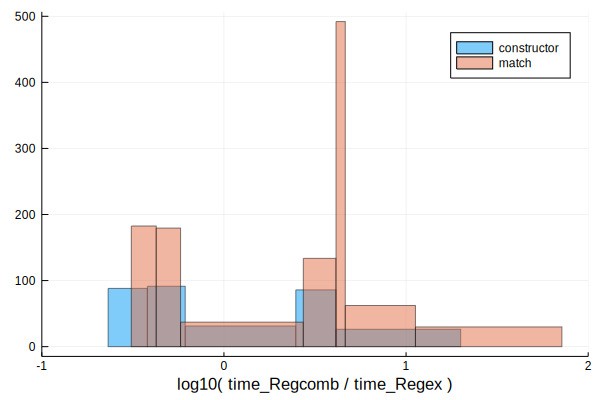

In [28]:
@df adata ea_histogram(:lratio;group=:type,bins=:scott,xlim=(-1,2),bar_position=:stack, alpha=.5, xlabel="log10( time_Regcomb / time_Regex )")

In [8]:
savefig("log_btime_ratio_histogram.svg")

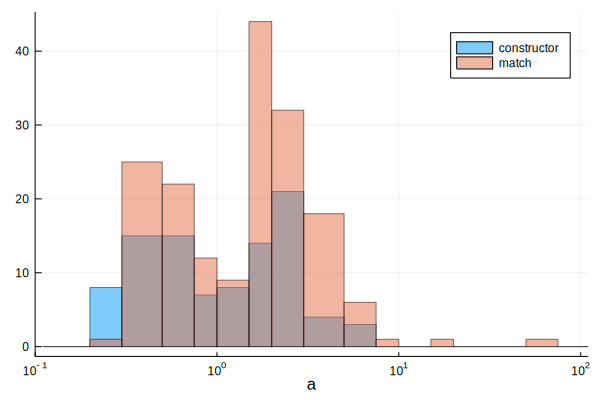

In [20]:
scale = (:xscale=>:log10, 
         :xlim=>(.1,110), 
        :bins=>[.11,.2,.3,.5,.75,1,1.5,2,3,5,7.5,10,15,20,30,50,75,100,1000])
@df adata histogram(:ratio; scale...,group=:type, bar_position=:stack, alpha=.5, xlabel="a")

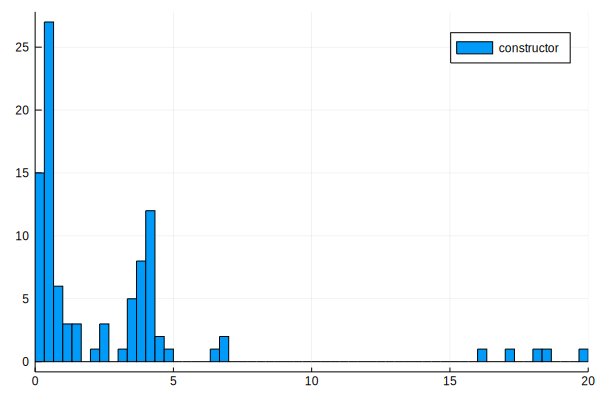

In [29]:

@df filter(x->x.creation,adata) histogram(:ratio; label="constructor", xlim=(0,20),bins=Float64[0:60...]./3.0)

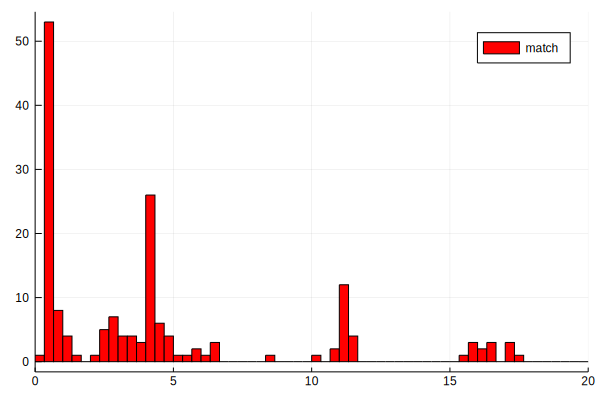

In [30]:
@df filter(x->!x.creation,adata) histogram(:ratio; label="match", color=:red, xlim=(0,20),bins=Float64[0:60...]./3.0)
